<a href="https://colab.research.google.com/github/gitmystuff/DTSC5502/blob/main/Module_08/Module_8_Activity_Complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 8 Activity

by DTSC5502

## Overview

* Regression Models
* Matrix Weights
* Stepwise Feature Selection
* Regularization
* R-Squared
* Adjusted R-Square
* F-Statistic
* AIC / BIC
* Coefficient Table in OLS Summary
* Pipelines
* Overfitting and Underfitting

## Data Model Building Review

### Get Data

In [ ]:
# create dataframe
# get the data
import pandas as pd

advertising = pd.read_csv('https://raw.githubusercontent.com/gitmystuff/INFO4050/main/Datasets/Advertising.csv', usecols=['TV', 'radio', 'newspaper', 'sales'])

print(advertising.shape)
print(advertising.info())
advertising.head()



(200, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### Train Test Split

Whatever we do with X_train we have to do with X_test but with some considerations:

* if we scale a feature, we fit_transform (train) on X_train and then only transform on X_test
* For things like Variance Inflation Factor, we find the VIF scores for X_train only, but after we decide which features to drop we have to drop from both X_train and X_test

In [ ]:
# train test split (what is the dependent (y) variable)?, print the shapes for X_train and X_test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    advertising.drop('sales', axis=1),
    advertising['sales'],
    test_size=0.25,
    random_state=42)

### Create Models

#### Sklearn Linear Regression

In [ ]:
# create and train a Linear Regression model from the sklearn.linear_model library (be sure to only use numeric data - _get_numeric_data() for X_train and X_test)
# make predictions and provide MSE and RSquared scores
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# test set prediction results
yhat = lr_model.predict(X_test)
print(f'MSE: {mean_squared_error(y_true=y_test, y_pred=yhat)}')
print(f'R-Squared: {r2_score(y_test, yhat)}')


MSE: 2.880023730094193
R-Squared: 0.8935163320163657


In [ ]:
# make a prediction
d = {'TV': 232.1, 'radio': 8.6, 'newspaper': 8.7}
d = pd.Series(d)
lr_model.predict(pd.DataFrame([d]))

array([14.99230101])

In [ ]:
# view the coefficients and intercept
print(list(zip(X_train, lr_model.coef_)))
print(lr_model.intercept_)

[('TV', 0.045433558624649865), ('radio', 0.19145653561741385), ('newspaper', 0.002568090815700641)]
2.778303460245283


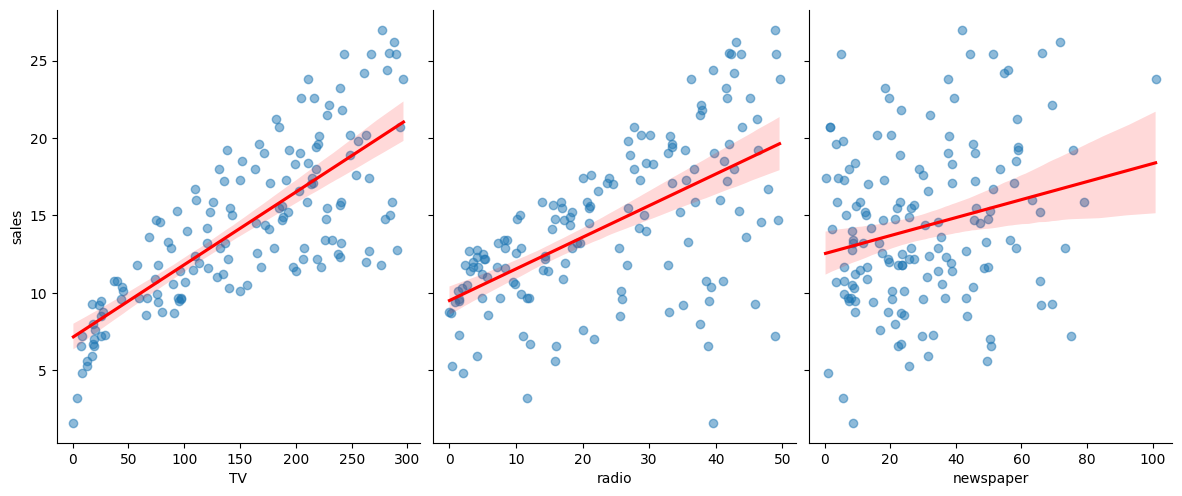

In [ ]:
# create a seaborn pairplot showing the scatter plots of three features with the lowest p-values from the summary above
# include line of best fit and the translucent confidence intervals
import pandas as pd
import seaborn as sns

sns.pairplot(data=pd.concat([X_train, y_train], axis=1), x_vars=X_train[['TV', 'radio', 'newspaper']].columns, y_vars='sales',
             kind='reg',
             height=5,
             aspect=0.8,
             plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.5}});

#### Statsmodel OLS

In [ ]:
# create an OLS model from statsmodels and print the summary
import statsmodels.api as sm

# features should have a constant or intercept
# X_train = sm.add_constant(X_train)
X_train.insert(0, 'const', 1)
ols_model = sm.OLS(y_train, X_train).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     422.2
Date:                Thu, 12 Oct 2023   Prob (F-statistic):           1.02e-71
Time:                        17:48:23   Log-Likelihood:                -289.20
No. Observations:                 150   AIC:                             586.4
Df Residuals:                     146   BIC:                             598.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7783      0.375      7.415      0.0

#### Linear Algebra Weights

Take these three features and get the weights of these features by using np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)) as found in the The DataFrame as a Matrix section of the Module 6 Activity notebook. Then using an f string extract the weights from these variables and print a line equation that resembles the example found in the Linear Algebra section of the Module 6 Activity notebook that reads $h_\theta(x) = \theta_0 + \theta_1x_1 ... \theta_nx_n$

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# linalg needs constant that was inserted for OLS and we already have OLS model
print('Sklearn Linear Regression Model')
print(list(zip(X_train, lr_model.coef_)))
print(lr_model.intercept_)
print()
print('StatsModel')
print(ols_model.params)
print()
print('Numpy Linear Algebra')
print('weights = ', np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train))


Sklearn Linear Regression Model
[('const', 0.045433558624649865), ('TV', 0.19145653561741385), ('radio', 0.002568090815700641)]
2.778303460245283

StatsModel
const        2.778303
TV           0.045434
radio        0.191457
newspaper    0.002568
dtype: float64

Numpy Linear Algebra
weights =  [2.77830346e+00 4.54335586e-02 1.91456536e-01 2.56809082e-03]


### Reflections on Data Model Building Review

## Simulated Data Example

### Data Prep


In [ ]:
# create seed, run this cell as is, only edit your stud_id
import pandas as pd
import numpy as np
import pandas as pd
import string
import random
import re
from sklearn.datasets import make_regression


def make_null(r, w):
    rtn = random.choices([np.nan, r], weights=[w, 100-w])
    return re.sub(r"[\[\]]",'', str(rtn))


# provide your student id as stud_id, replace 123456789 (automatice 0 if not replaced with your student id)
stud_id = 123456789
my_seed = random.seed(stud_id)

# Do not edit this cell beyond this line
variables = [''.join(random.choices(string.ascii_lowercase, k=3)) for _ in range(20)]
print(variables)

X, y = make_regression(n_samples=100, n_features=10, n_informative=6)
random.shuffle(variables)
cols = variables[:10]
df = pd.DataFrame(data=X, columns=cols)
df[cols[0]] = round(df[cols[0]], 4)
df[variables[10]] = 0.03
df[variables[11]] = 0.07
df[variables[12]] = df[variables[0]]
df[variables[13]] = df[cols[1]]
df[variables[10]] = df[variables[10]].apply(make_null, args=(2,))
df[variables[13]] = df[variables[13]].apply(make_null, args=(5,))
df[variables[14]] = random.sample(range(100, 1000), k=100)
df[variables[15]] = random.sample(range(1000, 10000), k=100)

df[variables[7]] = df[variables[7]].apply(lambda r: abs(r) if (r < -0.02) else r)
df[variables[8]] = df[variables[8]].apply(lambda r: abs(r)*-1 if (r > 0.01) else r)
df[variables[9]] = df[variables[9]].apply(lambda r: abs(r) if (r < -0.01) else r)
df[variables[7]] = df[variables[7]].apply(make_null, args=(7,))
df[variables[8]] = df[variables[8]].apply(make_null, args=(8,))
df[variables[9]] = df[variables[9]].apply(make_null, args=(9,))

df = df[np.random.default_rng(seed=my_seed).permutation(df.columns.values)]

cats = [random.choice(['x', 'o']) for i in range(100)]
df['survival'] = cats
cats = [random.choice(['yes', 'no']) for i in range(100)]
df['treatment'] = cats
cats = [random.choice(['level 1', 'level 2', 'level 3']) for i in range(100)]
df['level'] = cats
cats = [random.choice(['stage 5', 'stage 4', 'stage 3', 'stage 2', 'stage 1']) for i in range(100)]
df['stage'] = cats

df['target'] = y

dupes = df.loc[0:5]
df = pd.concat([df, dupes], axis=0)
df = df.sample(frac=1).reset_index(drop=True)

# df.to_csv('midterm.csv', index=False) # comment this out after successful run so that you don't overwrite your data

['qoz', 'vvk', 'yrk', 'jko', 'fpa', 'paq', 'tir', 'pqc', 'irb', 'aqo', 'anl', 'kty', 'ggs', 'fhr', 'ist', 'end', 'sxo', 'vln', 'fqd', 'oyy']


In [ ]:
# df shape, info, and head
import pandas as pd

print(df.shape)
print(df.info())
df.head()

(106, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   irb        106 non-null    int64  
 1   kty        106 non-null    object 
 2   aqo        106 non-null    float64
 3   end        106 non-null    float64
 4   anl        106 non-null    object 
 5   fpa        106 non-null    object 
 6   tir        106 non-null    object 
 7   ist        106 non-null    float64
 8   yrk        106 non-null    float64
 9   sxo        106 non-null    float64
 10  pqc        106 non-null    int64  
 11  fqd        106 non-null    object 
 12  oyy        106 non-null    float64
 13  vvk        106 non-null    float64
 14  qoz        106 non-null    float64
 15  paq        106 non-null    float64
 16  survival   106 non-null    object 
 17  treatment  106 non-null    object 
 18  level      106 non-null    object 
 19  stage      106 non-null    object 
 20  

,irb,kty,aqo,end,anl,fpa,tir,ist,yrk,sxo,...,fqd,oyy,vvk,qoz,paq,survival,treatment,level,stage,target
0,9240,0.20785014694305012,0.07,-0.247586,0.4101244766158785,-1.586932183900074,-0.253421319002204,-0.6922,-0.328912,-0.6922,...,0.03,-0.253421,-0.280574,0.298286,-0.429847,o,no,level 2,stage 5,102.157219
1,1186,0.4167770031997136,0.07,0.726584,0.06034257243580018,-0.7667548564334385,-0.3735918426639245,1.3631,0.759456,1.3631,...,0.03,-0.373592,0.532266,1.451836,-0.379443,o,no,level 2,stage 4,12.612470
2,8961,1.854649522988385,0.07,-0.294381,0.33183497845502863,-0.8765588861908645,1.1863499352782225,1.2133,-0.217995,1.2133,...,0.03,1.186350,0.450199,-1.077972,-1.688467,o,yes,level 1,stage 4,89.099686
3,9239,0.2796062168909321,0.07,1.665539,0.7224893598073586,-0.8653844197148541,-1.896301452743595,1.4736,-0.393457,1.4736,...,0.03,-1.896301,0.363343,-0.824743,0.058073,x,no,level 2,stage 2,206.975393
4,9389,0.8028250164444801,0.07,-0.264798,0.7365414673163051,-0.5528127610275055,nan,-0.8881,-0.120116,-0.8881,...,0.03,-1.313585,-0.113648,1.756771,3.060897,x,yes,level 1,stage 5,23.367052


In [ ]:
# identify constants
constants = [
    val for val in df.columns if len(df[val].fillna(0).unique()) == 1
]

constants

['aqo']

In [ ]:
# drop constants
df.drop(constants, axis=1, inplace=True)

In [ ]:
# identify quasi constant values (sometimes these may be boolean features)
quasi_consts = []
for val in df.columns.sort_values():
    if (len(df[val].unique()) < 3):
        val_counts = df[val].value_counts(normalize=True)
        print(val_counts)
        if list(val_counts)[0] > .98:
            quasi_consts.append(val)

print('quasi_consts', quasi_consts)

0.03    0.981132
nan     0.018868
Name: fqd, dtype: float64
o    0.556604
x    0.443396
Name: survival, dtype: float64
yes    0.509434
no     0.490566
Name: treatment, dtype: float64
quasi_consts ['fqd']


In [ ]:
# drop the variables with low cardinality (quasi constants with unbalanced labels)
df.drop(quasi_consts, axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   irb        106 non-null    int64  
 1   kty        106 non-null    object 
 2   end        106 non-null    float64
 3   anl        106 non-null    object 
 4   fpa        106 non-null    object 
 5   tir        106 non-null    object 
 6   ist        106 non-null    float64
 7   yrk        106 non-null    float64
 8   sxo        106 non-null    float64
 9   pqc        106 non-null    int64  
 10  oyy        106 non-null    float64
 11  vvk        106 non-null    float64
 12  qoz        106 non-null    float64
 13  paq        106 non-null    float64
 14  survival   106 non-null    object 
 15  treatment  106 non-null    object 
 16  level      106 non-null    object 
 17  stage      106 non-null    object 
 18  target     106 non-null    float64
dtypes: float64(9), int64(2), object(8)
memory usage: 1

In [ ]:
# identify duplicate rows
df[df.duplicated(keep=False)]

,irb,kty,end,anl,fpa,tir,ist,yrk,sxo,pqc,oyy,vvk,qoz,paq,survival,treatment,level,stage,target
9,9942,2.3491529381403127,0.858756,nan,-0.10961980999582872,0.8804585510033882,0.8054,0.868008,0.8054,869,0.880459,1.156299,0.012185,0.004880,x,no,level 3,stage 3,12.197979
11,2236,1.947179920054276,-0.107952,2.655706384290995,-0.5279143360146117,nan,-0.4796,-0.903942,-0.4796,678,1.838073,0.421175,-0.974881,0.511342,o,no,level 1,stage 4,-194.165768
25,9823,1.3655061055736304,1.143449,0.5910253802876737,nan,-0.7587358327656277,1.4184,0.497499,1.4184,460,-0.758736,-1.795745,1.302489,-0.369325,o,yes,level 3,stage 4,-81.795228
31,8680,0.8256983428345537,0.539976,1.0161777362926376,nan,0.017796213503991732,0.1133,-1.837110,0.1133,427,0.017796,0.124857,0.084540,-0.045211,x,yes,level 3,stage 4,-98.942929
40,3131,0.30417541574225737,-0.806889,0.2601617963197636,-1.4875162885951885,-1.1243633779712,0.1418,1.440215,0.1418,268,-1.124363,0.781218,0.670847,0.348938,x,no,level 3,stage 5,168.979895
41,5528,0.8175332260160089,-0.785193,1.098161549784729,-0.054304504547112595,-0.832864891687931,1.0423,-2.125309,1.0423,415,-0.832865,0.059027,0.088473,0.376466,o,no,level 3,stage 4,20.458993
49,5528,0.8175332260160089,-0.785193,1.098161549784729,-0.054304504547112595,-0.832864891687931,1.0423,-2.125309,1.0423,415,-0.832865,0.059027,0.088473,0.376466,o,no,level 3,stage 4,20.458993
52,9942,2.3491529381403127,0.858756,nan,-0.10961980999582872,0.8804585510033882,0.8054,0.868008,0.8054,869,0.880459,1.156299,0.012185,0.004880,x,no,level 3,stage 3,12.197979
55,3131,0.30417541574225737,-0.806889,0.2601617963197636,-1.4875162885951885,-1.1243633779712,0.1418,1.440215,0.1418,268,-1.124363,0.781218,0.670847,0.348938,x,no,level 3,stage 5,168.979895
58,8680,0.8256983428345537,0.539976,1.0161777362926376,nan,0.017796213503991732,0.1133,-1.837110,0.1133,427,0.017796,0.124857,0.084540,-0.045211,x,yes,level 3,stage 4,-98.942929


In [ ]:
# drop duplicate rows and print shape
df.drop_duplicates(inplace=True)
df.shape

(100, 19)

In [ ]:
# check of duplicate columns
duplicate_variables = []
for i in range(0, len(df.columns)):
    orig = df.columns[i]

    for dupe in df.columns[i + 1:]:
        if df[orig].equals(df[dupe]):
            duplicate_variables.append(dupe)
            print(f'{orig} looks the same as {dupe}')

duplicate_variables

ist looks the same as sxo


['sxo']

In [ ]:
# drop duplicate features and output shape
df.drop(duplicate_variables, axis=1, inplace=True)
df.shape

(100, 18)

### Imputation

No need for imputation when using XGBoost, LightGBM, CatBoost - https://towardsdatascience.com/your-dataset-has-missing-values-do-nothing-10d1633b3727

Use histograms to view the shape of your numerical features.
* Use median to replace missing data for skewed features
* Use interpolation to replace missing data for features that look normal

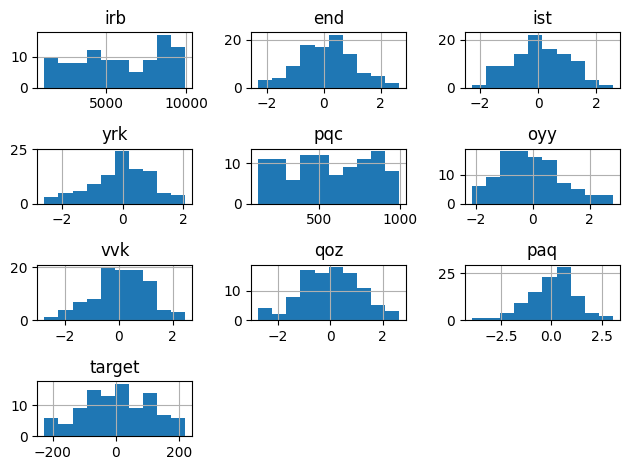

In [ ]:
# plot histograms
import matplotlib.pyplot as plt

df.hist()
plt.tight_layout();

In [ ]:
# show null values for each variable
df.isnull().sum()

irb          0
kty          0
end          0
anl          0
fpa          0
tir          0
ist          0
yrk          0
pqc          0
oyy          0
vvk          0
qoz          0
paq          0
survival     0
treatment    0
level        0
stage        0
target       0
dtype: int64

In [ ]:
# print info to recall which variables are numeric vs categorical
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 105
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   irb        100 non-null    int64  
 1   kty        100 non-null    object 
 2   end        100 non-null    float64
 3   anl        100 non-null    object 
 4   fpa        100 non-null    object 
 5   tir        100 non-null    object 
 6   ist        100 non-null    float64
 7   yrk        100 non-null    float64
 8   pqc        100 non-null    int64  
 9   oyy        100 non-null    float64
 10  vvk        100 non-null    float64
 11  qoz        100 non-null    float64
 12  paq        100 non-null    float64
 13  survival   100 non-null    object 
 14  treatment  100 non-null    object 
 15  level      100 non-null    object 
 16  stage      100 non-null    object 
 17  target     100 non-null    float64
dtypes: float64(8), int64(2), object(8)
memory usage: 14.8+ KB


In [ ]:
# replace missing data with appropriate mean, median, or mode and confirm with isnull().sum()

# select missing values - https://stackoverflow.com/questions/68018432/make-a-list-of-the-variables-that-contain-missing-values-pandas
feats_with_na = [feat for feat in df._get_numeric_data().columns if df[feat].isnull().sum() > 0]
print(feats_with_na)
print()

# impute based on skewness score
for feat in feats_with_na:
  print(feat, df.feat.skew(axis=1))
  if df.feat.skew(axis=1) > 4:
    df.feat.fillna(df.feat.median(), inplace=True)
  else:
    df.feat.fillna(df.feat.mean(), inplace=True)

df.isnull().sum()

[]



irb          0
kty          0
end          0
anl          0
fpa          0
tir          0
ist          0
yrk          0
pqc          0
oyy          0
vvk          0
qoz          0
paq          0
survival     0
treatment    0
level        0
stage        0
target       0
dtype: int64

### Train Test Split

In [ ]:
# train test split (target is the dependent (y) variable), print the shapes for X_train and X_test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.drop('target', axis=1),
    df['target'],
    test_size=0.25,
    random_state=42)

**Important:** We will not be using df (the dataframe we created above) for the remaining code. Instead we will be using X_train for df and X_test when appropriate.

### Exploratory Data Analysis

In [ ]:
# describe X_train
X_train.describe()

,irb,end,ist,yrk,pqc,oyy,vvk,qoz,paq
count,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000
mean,5801.146667,0.046772,0.200185,0.021592,560.400000,-0.124050,0.010178,0.020697,0.037865
std,2789.995499,1.066403,0.950741,0.953328,256.921483,1.099068,1.014265,1.178543,1.208325
min,1160.000000,-2.311683,-1.726900,-2.412349,127.000000,-2.137644,-2.770190,-2.736685,-3.934624
25%,3221.500000,-0.715446,-0.445300,-0.610469,365.500000,-0.958240,-0.633237,-0.818831,-0.694947
50%,5843.000000,0.009297,0.159300,0.106025,541.000000,-0.373592,0.001290,0.033139,0.224515
75%,8404.500000,0.767723,0.908250,0.679996,776.500000,0.527340,0.781911,0.908416,0.765463
max,9942.000000,2.648445,2.572200,1.871001,995.000000,2.816799,2.467461,2.535983,2.788896


Using X_train.describe(), identify the two features with max values greater than 100. These features have scales that are quite different than the other features and must be scaled so that they share the same scale as the other features. Standardize one feature and Normalize the other feature.

In [ ]:
# standardize feature
from sklearn.preprocessing import StandardScaler

feat = X_train._get_numeric_data().idxmax(1).iloc[0]
scaler = StandardScaler()
X_train[feat] = scaler.fit_transform(X_train[[feat]].values)
X_test[feat] = scaler.transform(X_test[[feat]].values)

In [ ]:
# normalize feature
from sklearn.preprocessing import MinMaxScaler

feat = X_train._get_numeric_data().idxmax(1).iloc[0]
scaler = MinMaxScaler()
X_train[feat] = scaler.fit_transform(X_train[[feat]].values)
X_test[feat] = scaler.transform(X_test[[feat]].values)

In [ ]:
# describe X_train again to verify transformations
X_train.describe()

,irb,end,ist,yrk,pqc,oyy,vvk,qoz,paq
count,7.500000e+01,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000
mean,6.217249e-17,0.046772,0.200185,0.021592,0.499309,-0.124050,0.010178,0.020697,0.037865
std,1.006734e+00,1.066403,0.950741,0.953328,0.295992,1.099068,1.014265,1.178543,1.208325
min,-1.674698e+00,-2.311683,-1.726900,-2.412349,0.000000,-2.137644,-2.770190,-2.736685,-3.934624
25%,-9.308324e-01,-0.715446,-0.445300,-0.610469,0.274770,-0.958240,-0.633237,-0.818831,-0.694947
50%,1.510224e-02,0.009297,0.159300,0.106025,0.476959,-0.373592,0.001290,0.033139,0.224515
75%,9.393867e-01,0.767723,0.908250,0.679996,0.748272,0.527340,0.781911,0.908416,0.765463
max,1.494174e+00,2.648445,2.572200,1.871001,1.000000,2.816799,2.467461,2.535983,2.788896


In [ ]:
# X_train.info()
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75 entries, 15 to 53
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   irb        75 non-null     float64
 1   kty        75 non-null     object 
 2   end        75 non-null     float64
 3   anl        75 non-null     object 
 4   fpa        75 non-null     object 
 5   tir        75 non-null     object 
 6   ist        75 non-null     float64
 7   yrk        75 non-null     float64
 8   pqc        75 non-null     float64
 9   oyy        75 non-null     float64
 10  vvk        75 non-null     float64
 11  qoz        75 non-null     float64
 12  paq        75 non-null     float64
 13  survival   75 non-null     object 
 14  treatment  75 non-null     object 
 15  level      75 non-null     object 
 16  stage      75 non-null     object 
dtypes: float64(9), object(8)
memory usage: 10.5+ KB


In [ ]:
# check for outliers
for feat in X_train._get_numeric_data().columns[1:]:
    q1 = X_train[feat].quantile(0.25)
    q3 = X_train[feat].quantile(0.75)
    iqr = q3 - q1
    lower_fence = (q1 - 1.5 * iqr).round()
    upper_fence = (q3 + 1.5 * iqr).round()
    lower_count = X_train[feat][X_train[feat] < lower_fence].count()
    upper_count = X_train[feat][X_train[feat] > upper_fence].count()
    print(f'{feat} outliers = {lower_count + upper_count}: lower_fence: {lower_fence}, upper_fence: {upper_fence}, lower_count: {lower_count}, upper_count: {upper_count}')


end outliers = 0: lower_fence: -3.0, upper_fence: 3.0, lower_count: 0, upper_count: 0
ist outliers = 0: lower_fence: -2.0, upper_fence: 3.0, lower_count: 0, upper_count: 0
yrk outliers = 0: lower_fence: -3.0, upper_fence: 3.0, lower_count: 0, upper_count: 0
pqc outliers = 0: lower_fence: -0.0, upper_fence: 1.0, lower_count: 0, upper_count: 0
oyy outliers = 0: lower_fence: -3.0, upper_fence: 3.0, lower_count: 0, upper_count: 0
vvk outliers = 0: lower_fence: -3.0, upper_fence: 3.0, lower_count: 0, upper_count: 0
qoz outliers = 0: lower_fence: -3.0, upper_fence: 3.0, lower_count: 0, upper_count: 0
paq outliers = 2: lower_fence: -3.0, upper_fence: 3.0, lower_count: 2, upper_count: 0


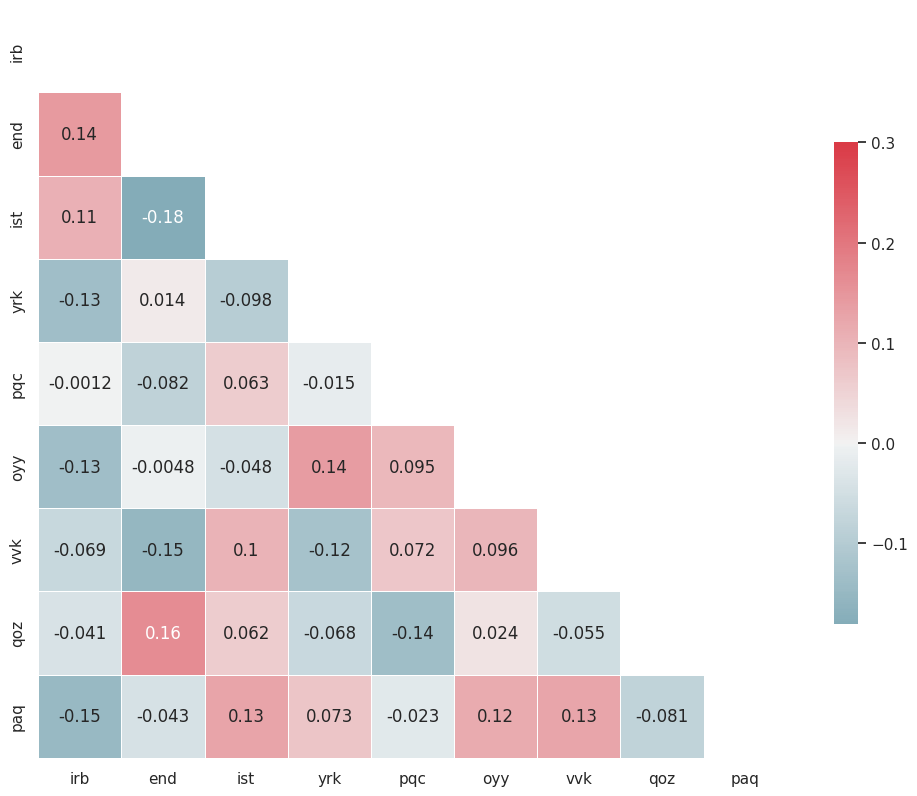

In [ ]:
# show correlation heat map for features, check for multicollinearity
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# correlation matrix
sns.set(style="white")

# compute the correlation matrix
corr = X_train._get_numeric_data().corr()

# generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# set up the matplotlib figure
# f, ax = plt.subplots()
f = plt.figure(figsize=(10, 10))

# generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True);

plt.tight_layout()

In [ ]:
# https://gist.github.com/wjptak/88575bbc5dde446e1186ffd41475c0f1

hi_corr = []

def get_highly_correlated_pairs(df, features, threshold=0.5):
  corr_df = df[features].corr() # get correlations
  correlated_features = np.where(np.abs(corr_df) > threshold) # select ones above the abs threshold
  correlated_features = [(corr_df.iloc[x,y], x, y) for x, y in zip(*correlated_features) if x != y and x < y] # avoid duplication
  s_corr_list = sorted(correlated_features, key=lambda x: -abs(x[0])) # sort by correlation value

  if s_corr_list == []:
    print("There are no highly correlated features with correlation above", threshold)
  else:
    for v, i, j in s_corr_list:
      cols = df[features].columns
      # print ("%s and %s = %.3f" % (corr_df.index[i], corr_df.columns[j], v))
      hi_corr.append([corr_df.index[i], corr_df.index[j]])

get_highly_correlated_pairs(X_train._get_numeric_data(), X_train._get_numeric_data().columns)
# hi_corr

There are no highly correlated features with correlation above 0.5


In [ ]:
# delete one of the features out of the pair(s) that show multicollinearity
for pairs in hi_corr:
  # print(pairs[0])
  X_train.drop(pairs[0], axis=1, inplace=True)
  X_test.drop(pairs[0], axis=1, inplace=True)

In [ ]:
# vif test
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = X_train._get_numeric_data().dropna().copy()
# add constant
X.insert(0, 'const', 1)

# create dataframe to store vif information
vif = pd.DataFrame()
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# remove constant (first row) and show vif dataframe
X.drop('const', axis=1, inplace=True)
vif = vif.iloc[1: , :]
vif

,Feature,VIF
1,irb,1.107637
2,end,1.121539
3,ist,1.110217
4,yrk,1.073783
5,pqc,1.044505
6,oyy,1.069331
7,vvk,1.079042
8,qoz,1.084732
9,paq,1.086143


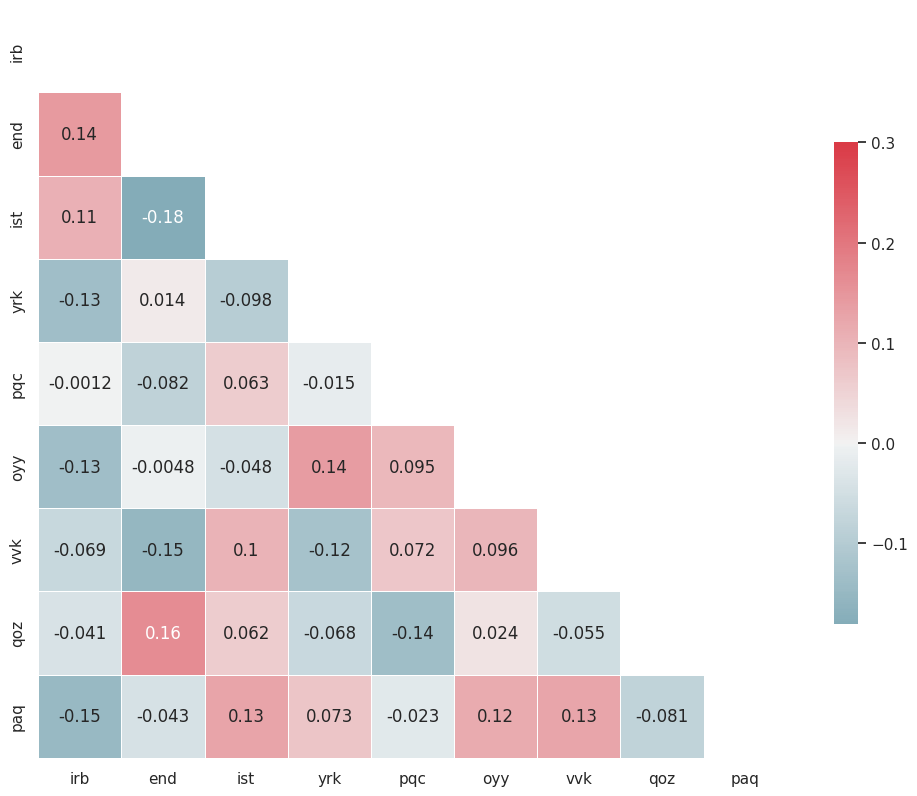

In [ ]:
# show correlation heat map for features, check for multicollinearity
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# correlation matrix
sns.set(style="white")

# compute the correlation matrix
corr = X_train._get_numeric_data().corr()

# generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# set up the matplotlib figure
# f, ax = plt.subplots()
f = plt.figure(figsize=(10, 10))

# generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True);

plt.tight_layout()

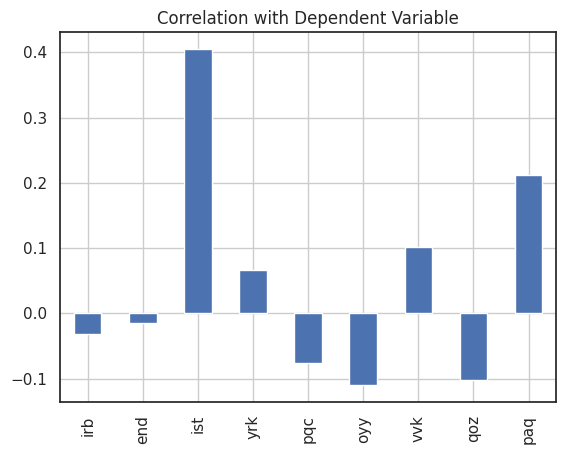

In [ ]:
# correlation with target
X_train._get_numeric_data().corrwith(y_train).plot.bar(
        title = 'Correlation with Dependent Variable', rot = 90, grid = True);

### Create the Models

In [ ]:
# sklearn linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr_model = LinearRegression()
lr_model.fit(X_train._get_numeric_data(), y_train)
# lr_feat_coeffs = list(zip(X_train._get_numeric_data(), lr_model.coef_))
feats = ['const']
feats.extend(X_train._get_numeric_data().columns)
coefs = [lr_model.intercept_]
coefs.extend(lr_model.coef_)
d = {'Feature': feats, 'Coef': coefs}
lr_df = pd.DataFrame(d)
print(lr_df)

# test set prediction results
yhat = lr_model.predict(X_test._get_numeric_data())
print(f'MSE: {mean_squared_error(y_true=y_test, y_pred=yhat)}')
print(f'R-Squared: {r2_score(y_test, yhat)}')

  Feature       Coef
0   const  27.683494
1     irb  -7.392657
2     end   9.693590
3     ist  45.259188
4     yrk  10.819213
5     pqc -35.182626
6     oyy -11.325558
7     vvk   7.629830
8     qoz -11.815294
9     paq  11.278161
MSE: 10922.494434532578
R-Squared: 0.03571384574545178


In [ ]:
# statsmodel ols
import statsmodels.api as sm

# features should have a constant or intercept
# X_train = sm.add_constant(X_train)
X_with_const = X_train._get_numeric_data().copy()
X_with_const.insert(0, 'const', 1)
ols_model = sm.OLS(y_train, X_with_const).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     2.422
Date:                Thu, 12 Oct 2023   Prob (F-statistic):             0.0194
Time:                        17:48:37   Log-Likelihood:                -441.43
No. Observations:                  75   AIC:                             902.9
Df Residuals:                      65   BIC:                             926.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.6835     21.852      1.267      0.2

In [ ]:
# matrices
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# linalg needs constant that was inserted for OLS and we already have OLS model
print('Sklearn Linear Regression Model')
print(lr_df)
# print(lr_model.intercept_)
print()
print('StatsModel')
print(ols_model.params)
print()

X = X_with_const
y = y_train
print('Numpy Linear Algebra')
print('weights = ', np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y))

Sklearn Linear Regression Model
  Feature       Coef
0   const  27.683494
1     irb  -7.392657
2     end   9.693590
3     ist  45.259188
4     yrk  10.819213
5     pqc -35.182626
6     oyy -11.325558
7     vvk   7.629830
8     qoz -11.815294
9     paq  11.278161

StatsModel
const    27.683494
irb      -7.392657
end       9.693590
ist      45.259188
yrk      10.819213
pqc     -35.182626
oyy     -11.325558
vvk       7.629830
qoz     -11.815294
paq      11.278161
dtype: float64

Numpy Linear Algebra
weights =  [ 27.68349371  -7.39265717   9.69359046  45.25918836  10.81921277
 -35.18262633 -11.32555848   7.62983009 -11.81529447  11.27816149]


### Reflections on Simulated Data Example

## Feature Selection

### Stepwise Feature Selection

* Backward Elimination: involves starting with all candidate variables, testing the deletion of each variable using a chosen model fit criterion, deleting the variable (if any) whose loss gives the most statistically insignificant deterioration of the model fit, and repeating this process until no further variables can be deleted without a statistically insignificant loss of fit.
* Forward Selection: involves starting with no variables in the model, testing the addition of each variable using a chosen model fit criterion, adding the variable (if any) whose inclusion gives the most statistically significant improvement of the fit, and repeating this process until none improves the model to a statistically significant extent.
* Mixed Selection: a combination of the above, testing at each step for variables to be included or excluded.

There's a lot of literature that is critical of using stepwise procedures and opts for regularization.

See Stepwise Feature Selection Notebook

### Regularization

* Lasso
* Ridge
* ElasticNet

In [ ]:
# create X _get_numeric_data() without constant
X_reg = X_with_const.drop('const', axis=1).copy()
print(X_reg.columns)
X_reg_test = X_test[X_reg.columns]
print(X_reg_test.columns)

Index(['irb', 'end', 'ist', 'yrk', 'pqc', 'oyy', 'vvk', 'qoz', 'paq'], dtype='object')
Index(['irb', 'end', 'ist', 'yrk', 'pqc', 'oyy', 'vvk', 'qoz', 'paq'], dtype='object')


#### Lasso / l1 Regularization

* $\alpha = \sum|w_i|$
* Forces weak features to have zero coefficients
* Performs feature selection
* Models can be unstable (coefficients fluctuate significantly on data changes with correlated features)

In [ ]:
# lasso example
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X_reg)
y = y_train
lasso_feats = X_reg.columns

lasso = Lasso(alpha=5)
lasso.fit(X, y)

d = {'Feature': lasso_feats, 'Coef': lasso.coef_}
lasso_df = pd.DataFrame(d)
print(lasso_df)

  Feature       Coef
0     irb  -0.699064
1     end   1.352764
2     ist  35.348749
3     yrk   4.603025
4     pqc  -4.970035
5     oyy  -5.890195
6     vvk   1.508779
7     qoz  -6.962301
8     paq  11.235589


#### Ridge / l2 Regularization

* $\alpha = \sum w_i^2$
* Spreads out coefficients more equally
* Exposes correlated features (have similar coefficients)
* Models are more stable (coefficients don't fluctuate as much on data changes with correlated features)

In [ ]:
# ridge example
from sklearn.linear_model import Ridge

scaler = StandardScaler()

# .values is used to avoid warning about training on feature names
# UserWarning: X has feature names, but Ridge was fitted without feature names
X = scaler.fit_transform(X_reg.values)
X_reg_test = scaler.transform(X_reg_test.values)
y = y_train.values
y_reg_test = y_test.values

ridge_feats = X_reg.columns

ridge = Ridge(alpha=10)
ridge.fit(X,y)

d = {'Feature': ridge_feats, 'Coef': ridge.coef_}
ridge_df = pd.DataFrame(d)
print(ridge_df)
print()
print(f'Training Score: {ridge.score(X, y)}')
print(f'Test Score: {ridge.score(X_reg_test, y_reg_test)}')

  Feature       Coef
0     irb  -5.688490
1     end   7.579956
2     ist  36.987370
3     yrk   8.695020
4     pqc  -8.822765
5     oyy -10.817629
6     vvk   6.826078
7     qoz -11.463644
8     paq  12.960747

Training Score: 0.24681510133943452
Test Score: 0.0064050301216525


In [ ]:
# compare
d = {'Original': X_reg.columns, 'Original Coeffs': lr_model.coef_.tolist(), 'Lasso': lasso_feats, 'Lasso Coeffs': lasso.coef_, 'Ridge': ridge_feats, 'Ridge Coeffs': ridge.coef_}
reg_df = pd.DataFrame(d)
print(reg_df[1:])

  Original  Original Coeffs Lasso  Lasso Coeffs Ridge  Ridge Coeffs
1      end         9.693590   end      1.352764   end      7.579956
2      ist        45.259188   ist     35.348749   ist     36.987370
3      yrk        10.819213   yrk      4.603025   yrk      8.695020
4      pqc       -35.182626   pqc     -4.970035   pqc     -8.822765
5      oyy       -11.325558   oyy     -5.890195   oyy    -10.817629
6      vvk         7.629830   vvk      1.508779   vvk      6.826078
7      qoz       -11.815294   qoz     -6.962301   qoz    -11.463644
8      paq        11.278161   paq     11.235589   paq     12.960747


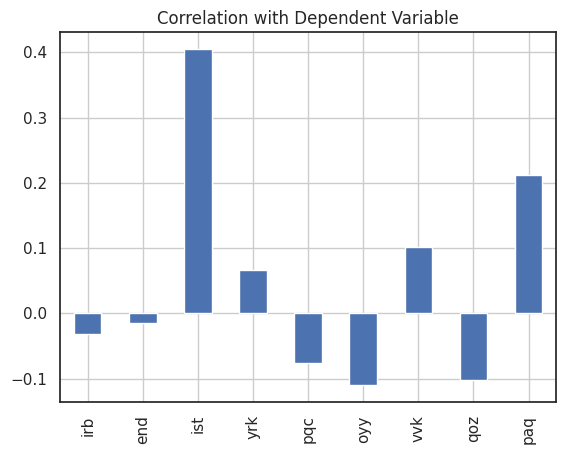

In [ ]:
# correlation with target
X_reg.corrwith(y_train).plot.bar(
        title = 'Correlation with Dependent Variable', rot = 90, grid = True);

In [ ]:
# https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas
corr_matrix = X_reg.corr().abs()
print(corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
                  .stack()
                  .sort_values(ascending=False))

end  ist    0.181033
     qoz    0.164316
     vvk    0.151669
irb  paq    0.149078
     end    0.143900
yrk  oyy    0.139297
pqc  qoz    0.137429
irb  yrk    0.134953
     oyy    0.134660
ist  paq    0.128943
vvk  paq    0.126660
yrk  vvk    0.123228
oyy  paq    0.115651
irb  ist    0.105126
ist  vvk    0.102129
     yrk    0.097848
oyy  vvk    0.096259
pqc  oyy    0.094835
end  pqc    0.082355
qoz  paq    0.081274
yrk  paq    0.072965
pqc  vvk    0.072445
irb  vvk    0.068701
yrk  qoz    0.068256
ist  pqc    0.062641
     qoz    0.061816
vvk  qoz    0.054661
ist  oyy    0.047898
end  paq    0.042853
irb  qoz    0.041369
oyy  qoz    0.024433
pqc  paq    0.023478
yrk  pqc    0.015341
end  yrk    0.013662
     oyy    0.004759
irb  pqc    0.001228
dtype: float64


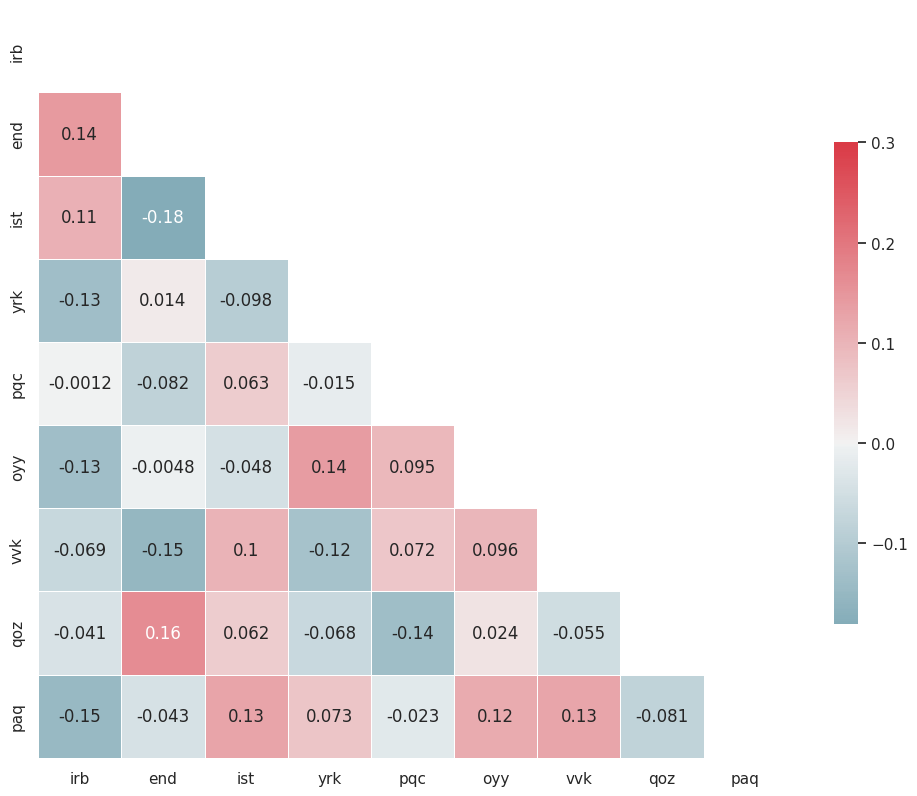

In [ ]:
# show correlation heat map for features, check for multicollinearity
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# correlation matrix
sns.set(style="white")

# compute the correlation matrix
corr = X_reg.corr()

# generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# set up the matplotlib figure
# f, ax = plt.subplots()
f = plt.figure(figsize=(10, 10))

# generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True);

plt.tight_layout()

In [ ]:
# ols summary recall
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     2.422
Date:                Thu, 12 Oct 2023   Prob (F-statistic):             0.0194
Time:                        17:48:42   Log-Likelihood:                -441.43
No. Observations:                  75   AIC:                             902.9
Df Residuals:                      65   BIC:                             926.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.6835     21.852      1.267      0.2

In [ ]:
# statsmodel ols feature selection per l1 regularization
# import statsmodels.api as sm

# X_sel_feats = X_reg[['qoz', 'oyy', 'vvk', 'pqc']]
# X_sel_feats.insert(0, 'const', 1)
# ols_model = sm.OLS(y_train, X_sel_feats).fit()
# print(ols_model.summary())

## Interpreting Some of the OLS Summary

### The Sum of Squares

See Analysis of Variance Notebook

#### Total Sum of Squares

According to Wikipedia, if $\bar{y}$ is the mean of the observed data:

$
\bar{y} = \frac{1}{N}\sum(y)
$

then the variability of the data set can be measured with two sums of squares formulas:

The total sum of squares (proportional to the variance of the data):

$
TSS = SS_{tot} = \sum(y - \bar{y})^2
$

#### Residual Sum of Squares

The sum of squares of residuals, also called the residual sum of squares:

$
RSS = SS_{res} = \sum(y - \hat{y})^2
$

$\hat{y}$ represents our predicted y.

With this information, we can get r-squared:

$
R^2 = 1 - \large{\frac{SS_{res}}{SS_{tot}}}
$

https://en.wikipedia.org/wiki/Residual_sum_of_squares

#### Explained Sum of Squares

Another sum of squares not mentioned is Explained Sum of Squares:

$
ESS = \sum(\hat{y} - \bar{y})^2
$

or

$
TSS = RSS + ESS
$

or

$
ESS = TSS - RSS
$

https://en.wikipedia.org/wiki/Explained_sum_of_squares

### R-squared

* $RSS = SS_{res} = \sum{(y - \hat{y})^2}$
* $TSS = SS_{tot} = \sum{(y - \bar{y})^2}$
* $R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$

In statistics, the coefficient of determination, denoted R2 or r2 and pronounced "R squared", is the proportion of the variation in the dependent variable that is predictable from the independent variable(s).

https://en.wikipedia.org/wiki/Coefficient_of_determination

In statistics, the Pearson correlation coefficient ― also known as Pearson's r ― is a measure of linear correlation between two sets of data. It is the ratio between the covariance of two variables and the product of their standard deviations; thus it is essentially a normalized measurement of the covariance, such that the result always has a value between −1 and 1. As with covariance itself, the measure can only reflect a linear correlation of variables, and ignores many other types of relationship or correlation. As a simple example, one would expect the age and height of a sample of teenagers from a high school to have a Pearson correlation coefficient significantly greater than 0, but less than 1 (as 1 would represent an unrealistically perfect correlation).

https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

* r shows correlation between x and y
* r squared shows strength of model, the proportion of the variance y that can be explained by X in a linear regression model

Cases where r-squared is $R^2$

* In simple linear regression (1 feature and 1 target)
* r identifies patterns / relationships
* $R^2$ identifies strength of model (low $R^2$ is not necessarily a bad thing as it is data model related)
* r is useless for evaluating predictions

Cases where pearson's r-squared is not $R^2$

* Try to distinguish between Pearson's r, correlation coefficient, and $R^2$, correlation of determination

#### R Squared, R, and r

* R-Squared: Coefficient of Determination, proportion of the variation in the dependent variable that is predictable from the independent variable(s)
* R: Coefficient of multiple correlation, a measure of how well a given variable can be predicted using a linear function of a set of other variables
* r: Pearson's r, correlation is different from regression, as it does not assume any sort of dependency between two quantitative variables and it is only meant to express their joint variability
* https://www.r-bloggers.com/2022/11/the-coefficient-of-determination-is-it-the-r-squared-or-r-squared/

### Adjusted R-squared

The formula for Adjusted R-Squared is:

$
R^2_{adj} = 1 - (1 - R^2)\large{\frac{n-1}{n - p - 1}}
$

or

$
R^2_{adj} = 1 - \large{\frac{\frac{SS_{res}}{df_e}}{\frac{SS_{tot}}{df_t}}}
$

where $df_t$ is the degrees of freedom n – 1 of the estimate of the population variance of the dependent variable, and $df_e$ is the degrees of freedom n – p – 1 of the estimate of the underlying population error variance. Note: p = parameters or features; n = observations

The adjusted R2 can be negative, and its value will always be less than or equal to that of R2. Unlike R2, the adjusted R2 increases only when the increase in R2 (due to the inclusion of a new explanatory variable) is more than one would expect to see by chance. If a set of explanatory variables with a predetermined hierarchy of importance are introduced into a regression one at a time, with the adjusted R2 computed each time, the level at which adjusted R2 reaches a maximum, and decreases afterward, would be the regression with the ideal combination of having the best fit without excess/unnecessary terms.

https://en.wikipedia.org/wiki/Coefficient_of_determination#Adjusted_R2

#### $R^2$ vs adj $R^2$

* R2 represents the proportion of the variance in the dependent variable explained by the independent variables. Adjusted R-squared considers the number of predictors in the model and penalizes excessive variables, providing a more accurate measure of the model's goodness of fit, especially with multiple predictors.
* If the R2 of a model is 0.50, then approximately half of the observed variation can be explained by the model's inputs.
* Adjusted R-squared is a modified version of R-squared that has been adjusted for the number of predictors in the model. The adjusted R-squared increases when the new term improves the model more than would be expected by chance. It decreases when a predictor improves the model by less than expected. Typically, the adjusted R-squared is positive, not negative. It is always lower than the R-squared.
* Adding more independent variables or predictors to a regression model tends to increase the R-squared value, which tempts makers of the model to add even more variables. This is called overfitting and can return an unwarranted high R-squared value. Adjusted R-squared is used to determine how reliable the correlation is and how much it is determined by the addition of independent variables.

Sources

* https://www.analyticsvidhya.com/blog/2020/07/difference-between-r-squared-and-adjusted-r-squared/
* https://www.investopedia.com/ask/answers/012615/whats-difference-between-rsquared-and-adjusted-rsquared.asp

### F-statistic

- In ANOVA, F-test provides an F-statistic that is compared to a critical value determined by the degrees of freedom which are determined by the number of groups and number of items in each group
- Considers two types of variance:
    * Between Groups: group mean varies from total mean (Treatment)
    * Within Groups: individual mean varies from group mean (Error)
- The F statistic is the ratio between these two variances

$
F = \frac{Variance Between Groups}{Variance Within Groups} = \frac{\frac{SSG}{df_{groups}}}{\frac{SSE}{df_{error}}} = \frac{\frac{SSG}{ngroups-1}}{\frac{SSE}{(n_{rows}-1)*n_{groups}}}
$

Variance revisited:

$\frac{SS}{df} = \frac{\sum(x - \bar{x})^2}{n - 1}$

Degrees of Freedom Info

https://statisticsbyjim.com/hypothesis-testing/degrees-freedom-statistics/

#### OLS

For our purposes recall

* $RSS = \sum{(y - \hat{y})^2}$
* $TSS = \sum{(y - \bar{y})^2}$
* $ESS = \sum{(\hat{y} - \bar{y})^2}$

$F = \frac{ESS}{p-1} / \frac{RSS}{n - p}$
$ = \frac{R^2}{p-1} / \frac{1 - R^2}{n - p}$

where n = observaions and p = features (parameters) and ESS = TSS - RSS

Another Perspective

* Full Model: SSE(Full) = $\sum(y - \hat{y})^2 = RSS$
* Reduced (Restricted) Model: SSE(Reduced) = $\sum(y - \bar{y})^2 = TSS$
* $F = \frac{SSE(R) - SSE(F)}{df_R - df_F} / \frac{SSE(F)}{df_F}$

where $df_R = n - 1$ and $df_F = n - 2$

Notes

* Comes to us by way of Hypothesis Tests, Test of Means, and ANOVA
* A t-test is used to evaluate two groups
* With more than two groups, or many Features vs 1 target, an F-test is used
* F-statistic finds significance of multiple features
* A small Prob (F-statistic), < .05, suggests there is a linear relationship between at least one Feature and the Target
* Can you improve your model by making it more complex or more simple?

Sources

* https://online.stat.psu.edu/stat501/lesson/6/6.2
* https://solutionshala.com/2020/01/19/how-to-test-overall-significance-of-regression-f-test-r-sq/


### AIC / BIC

AIC (stands for Akaike’s Information Criteria developed by Japanese statistician Hirotugo Akaike) and BIC (stands for Bayesian Information Criteria) are also used as criteria for model robustness. The goal is to minimize these values to get a better model.

Source

* https://towardsdatascience.com/simple-explanation-of-statsmodel-linear-regression-model-summary-35961919868b


### Coefficient Table in OLS Summary

* coefficients: The strength and direction of influence of that feature on the target (compared to other features)
* std error: ($\frac{\sigma}{\sqrt{n}}$) the estimate of the standard deviation of the coefficient
* t-statistic: coefficient / std error and compared to a critical value determines the probability of t
* p>|t|: the p-value, the probability under the null hypothesis assumption, of obtaining a result equal to or more extreme than what was actually observed, or, an indication that there is strong evidence against the null hypothesis which states that there is no effect on y
* [0.025   -   0.975]: the two tailed 95% confidence interval, notice that when a feature is significant it usually passes through 0 and the values are calculated by $coef \pm 1.96 * \frac{\sigma}{\sqrt{n}}$

Sources

* https://towardsdatascience.com/simple-explanation-of-statsmodel-linear-regression-model-summary-35961919868b
* https://medium.com/swlh/interpreting-linear-regression-through-statsmodels-summary-4796d359035a

In [ ]:
# model summary with fewer features
# X_sel_feats = X_reg[['oyy', 'vvk']]
# X_sel_feats.insert(0, 'const', 1)
# ols_model = sm.OLS(y_train, X_sel_feats).fit()
# print(ols_model.summary())

### Reflections on Feature Selection

## Pipelines

* https://medium.com/coinmonks/regularization-of-linear-models-with-sklearn-f88633a93a2

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe = [
    ('scalar', StandardScaler()),
    ('model', Lasso(alpha=5, fit_intercept=True))
]

pipe_model = Pipeline(pipe)
pipe_model.fit(X_reg.values, y_train.values)

d = {'Feature': X_reg.columns, 'Coef': pipe_model['model'].coef_}
pipe_df = pd.DataFrame(d)
print(pipe_df)
print()
print(f'Training Score: {pipe_model.score(X_reg.values, y_train.values)}')
print(f'Test Score: {pipe_model.score(X_reg_test, y_reg_test)}')
print()
print(f'Training Score: {lasso.score(X, y)}')
print(f'Test Score: {lasso.score(X_reg_test, y_reg_test)}')

  Feature       Coef
0     irb  -0.699064
1     end   1.352764
2     ist  35.348749
3     yrk   4.603025
4     pqc  -4.970035
5     oyy  -5.890195
6     vvk   1.508779
7     qoz  -6.962301
8     paq  11.235589

Training Score: 0.22354788489416777
Test Score: 0.001746525368402252

Training Score: 0.22354788489416777
Test Score: -0.007800649428271855


In [ ]:
# compare
d = {'Original': X_reg.columns, 'Original Coef': lr_model.coef_.tolist(),
     'Lasso': lasso_feats, 'Lasso Coef': lasso.coef_,
     'Ridge': ridge_feats, 'Ridge Coef': ridge.coef_,
     'Pipe': X_reg.columns, 'Pipe Coef': pipe_model['model'].coef_}
reg_df = pd.DataFrame(d)
print(reg_df[1:])

  Original  Original Coef Lasso  Lasso Coef Ridge  Ridge Coef Pipe  Pipe Coef
1      end       9.693590   end    1.352764   end    7.579956  end   1.352764
2      ist      45.259188   ist   35.348749   ist   36.987370  ist  35.348749
3      yrk      10.819213   yrk    4.603025   yrk    8.695020  yrk   4.603025
4      pqc     -35.182626   pqc   -4.970035   pqc   -8.822765  pqc  -4.970035
5      oyy     -11.325558   oyy   -5.890195   oyy  -10.817629  oyy  -5.890195
6      vvk       7.629830   vvk    1.508779   vvk    6.826078  vvk   1.508779
7      qoz     -11.815294   qoz   -6.962301   qoz  -11.463644  qoz  -6.962301
8      paq      11.278161   paq   11.235589   paq   12.960747  paq  11.235589


## Overfitting and Underfitting

In statistics, overfitting is "the production of an analysis that corresponds too closely or exactly to a particular set of data, and may therefore fail to fit additional data or predict future observations reliably". An overfitted model is a statistical model that contains more parameters than can be justified by the data.

<img src='https://docs.aws.amazon.com/images/machine-learning/latest/dg/images/mlconcepts_image5.png' alt='underfitting overfitting' />

https://docs.aws.amazon.com/machine-learning/latest/dg/model-fit-underfitting-vs-overfitting.html

If you're overfitting, or you are getting great training scores and poor  test scores, you might be overfitting so try removing the lesser performing features. The model is just memorizing the training data.

Underfitting occurs when a statistical model cannot adequately capture the underlying structure of the data. An under-fitted model is a model where some parameters or terms that would appear in a correctly specified model are missing.[2] Under-fitting would occur, for example, when fitting a linear model to non-linear data. Such a model will tend to have poor predictive performance.

If you're underfitting, or you are getting poor training scores and test scores, you might be underfitting so try adding more data or more features.

https://en.wikipedia.org/wiki/Overfitting

## Activity Summary

